In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import walk
import re
from keras.preprocessing.image import load_img
from PIL import Image
import glob
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow_addons import optimizers

from tensorflow.keras import layers
import tensorflow_hub as hub

## preparing the dataset

In [2]:
folder_path="C:\\Users\\estevan.amazonas\\Desktop\\EAAM (1)\\programacao\\ML_PROJETOS\\math_symbol_handwriting\\extracted_images"

In [3]:

files_path=glob.glob(folder_path+'/*/*')

In [4]:
df=pd.DataFrame(files_path,columns=['path'])

In [6]:
df['symbol']=df.path.str.slice(-5,-4)

In [6]:
df.path[0]

'C:\\Users\\estevan.amazonas\\Desktop\\EAAM (1)\\programacao\\ML_PROJETOS\\math_symbol_handwriting\\extracted_images\\!\\!_100071.jpg'

In [8]:
df['symbol']=df.path.map(lambda x: x.split('\\')[-2])

In [9]:
df.groupby('symbol').count()

,path
symbol,
!,1300
(,14294
),14355
+,25112
",",1906
...,...
w,556
y,9340
z,5870


In [14]:
df.groupby('symbol').count().sort_values('path')

,path
symbol,
exists,21
forall,45
in,47
lambda,109
Delta,137
...,...
+,25112
2,26141
1,26520


In [10]:
df.groupby('symbol').count().sort_values('path')/len(df)*100

,path
symbol,
exists,0.005585
forall,0.011969
in,0.012501
lambda,0.028991
Delta,0.036439
...,...
+,6.679185
2,6.952874
1,7.053679


In [11]:
df.symbol=pd.Categorical(df.symbol)


In [12]:
df['code_symbol']=df.symbol.cat.codes

In [13]:
df.head()

,path,symbol,code_symbol
0,C:\Users\estevan.amazonas\Desktop\EAAM (1)\pro...,!,0
1,C:\Users\estevan.amazonas\Desktop\EAAM (1)\pro...,!,0
2,C:\Users\estevan.amazonas\Desktop\EAAM (1)\pro...,!,0
3,C:\Users\estevan.amazonas\Desktop\EAAM (1)\pro...,!,0
4,C:\Users\estevan.amazonas\Desktop\EAAM (1)\pro...,!,0


In [68]:
len(df)

375974

## Exploring the dataset

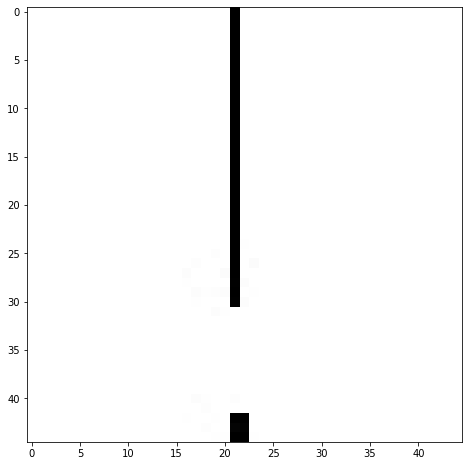

In [69]:
img=Image.open(df.path[0])
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')


In [31]:
img=Image.open(df.path[0])
print(img.size)

(45, 45)


In [32]:
Image.open(df.path[0]).size

(45, 45)

In [37]:
for path in df.path.sample(100):
    print(Image.open(path).size)

(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)
(45, 45)


In [215]:
def load_img(path):
    return Image.open(path)

def img_to_flatten_array(img):
    return np.array(img)

def something(paths):
    array_list=[]
    for path in paths:
        img=load_img(path)
        array=img_to_flatten_array(img)
        array_list.append(array)
    return np.array(array_list)



In [88]:
img=load_img(df.path[0])
array=img_to_flatten_array(img)

In [77]:
array.shape

(2025,)

In [275]:
x_train_path,x_test_path,y_train_code,y_test_code=train_test_split(df.index.values,df.code_symbol.values, test_size=0.05,train_size=0.50,random_state=123,stratify=df.code_symbol)

In [258]:
N=len(y_train_code)
teste=np.zeros((N,82))
teste[np.arange(N),y_train_code]=10

def y_label(data,dim=82):
    N=len(data)
    array=np.zeros((N,dim))
    array[np.arange(N),data]=1
    return array


In [276]:
y_train=y_label(y_train_code)

In [277]:
df.path.loc[x_train_path].values.shape

(187987,)

In [278]:
x_train=something(df.path.loc[x_train_path].values)

In [282]:
print(len(x_train_path),len(y_train),len(x_train))

187987 187987 187987


## Fist Try


In [352]:
model=keras.Sequential()
model.add(layers.Flatten(input_shape=(45,45)))
model.add(layers.Dense(30,activation='relu'))
model.add(layers.Dense(82,activation='softmax'))
opt=keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [284]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 2025)              0         
                                                                 
 dense_17 (Dense)            (None, 30)                60780     
                                                                 
 dense_18 (Dense)            (None, 82)                2542      
                                                                 
Total params: 63,322
Trainable params: 63,322
Non-trainable params: 0
_________________________________________________________________


In [285]:
x_train.shape

(187987, 45, 45)

In [286]:

history=model.fit(x_train,y_train,batch_size=5000,epochs=20)

Epoch 1/20
38/38 [==============================] - 2s 34ms/step - loss: 292.3219 - accuracy: 0.0668
Epoch 2/20
38/38 [==============================] - 1s 32ms/step - loss: 4.0770 - accuracy: 0.0789
Epoch 3/20
38/38 [==============================] - 1s 33ms/step - loss: 3.9153 - accuracy: 0.0904
Epoch 4/20
38/38 [==============================] - 1s 33ms/step - loss: 3.8193 - accuracy: 0.0904
Epoch 5/20
38/38 [==============================] - 1s 33ms/step - loss: 3.7638 - accuracy: 0.0904
Epoch 6/20
38/38 [==============================] - 1s 34ms/step - loss: 3.7314 - accuracy: 0.0904
Epoch 7/20
38/38 [==============================] - 1s 33ms/step - loss: 3.7115 - accuracy: 0.0904
Epoch 8/20
38/38 [==============================] - 1s 34ms/step - loss: 3.6984 - accuracy: 0.0904
Epoch 9/20
38/38 [==============================] - 1s 34ms/step - loss: 3.6895 - accuracy: 0.0904
Epoch 10/20
38/38 [==============================] - 1s 33ms/step - loss: 3.6833 - accuracy: 0.0904
Epoch 1

In [287]:
history.history['accuracy']

[0.06677057594060898,
 0.07894162833690643,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198,
 0.0904211476445198]

In [323]:
df.iloc[x_train_path].groupby('code_symbol').count().sort_values('path', ascending=False)

,path,symbol
code_symbol,,
5,16998,16998
27,13297,13297
7,13260,13260
8,13070,13070
3,12556,12556
...,...,...
19,69,69
52,55,55
46,23,23


In [324]:
16998/187987

0.09042114614308436

In [306]:
x_train[0].shape

(45, 45)

## improving the preprocessing step and using transfer learning techniques

In [154]:
def load_img(path):
    return Image.open(path)

def to_array(img):
    return np.array(img)

def resize_img(img,new_size):
    return img.resize(new_size)

def load_paths(indexs):
    return df.path.loc[indexs]

def preprocessing(indexs):
    paths=load_paths(indexs)
    array_list=[]
    for path in paths:
        img=load_img(path)
        img=resize_img(img,(28,28))
        array=to_array(img)
        array_list.append(array)

        
    return np.array(array_list)

In [17]:
hub_url='https://tfhub.dev/tensorflow/tfgan/eval/mnist/logits/1'

In [19]:
hub_url='https://tfhub.dev/tensorflow/tfgan/eval/mnist/logits/1'
model_layers=[hub.KerasLayer( handle=hub_url,input_shape=[28, 28, 1], trainable=False, name='images'), 
layers.Dense(20, activation='relu'),
layers.Dense(82, activation='softmax')]



model=keras.Sequential(model_layers,name='hand_writing')

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())




Model: "hand_writing"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 images (KerasLayer)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 82)                1722      
                                                                 
Total params: 1,942
Trainable params: 1,942
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
x_train_path,x_test_path,y_train,y_test=train_test_split(df.index.values,df.code_symbol.values, test_size=0.05,train_size=0.50,random_state=123,stratify=df.code_symbol)

In [23]:
x_train=preprocessing(x_train_path)
x_test=preprocessing(x_test_path)


In [84]:
df.groupby('symbol').count()


,path,code_symbol
symbol,,
!,1300,1300
(,14294,14294
),14355,14355
+,25112,25112
",",1906,1906
...,...,...
w,556,556
y,9340,9340
z,5870,5870


In [126]:
number_digits=np.array(np.arange(10),dtype=str)

In [133]:
df[['symbol','code_symbol']].drop_duplicates()[df.symbol.isin(number_digits)]

C:\Users\estevan.amazonas\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,symbol,code_symbol
90964,0,6
97878,1,7
124398,2,8
150539,3,9
161448,4,10
168844,5,11
172389,6,12
175507,7,13
178416,8,14
181484,9,15


In [137]:
df_train=df.loc[x_train_path]

In [ ]:
#baseline
print(len(df_train[df_train.symbol.isin(number_digits)])/len(df_train))

0.25070350609350645

## First results

In [117]:
history=model.fit(x_train,y_train,batch_size=500,epochs=20)

Epoch 1/20
376/376 [==============================] - 33s 87ms/step - loss: 40.5635 - accuracy: 0.1530
Epoch 2/20
376/376 [==============================] - 34s 90ms/step - loss: 5.4453 - accuracy: 0.2950
Epoch 3/20
376/376 [==============================] - 31s 82ms/step - loss: 3.2128 - accuracy: 0.3561
Epoch 4/20
376/376 [==============================] - 32s 85ms/step - loss: 2.7531 - accuracy: 0.3881
Epoch 5/20
376/376 [==============================] - 32s 84ms/step - loss: 2.5550 - accuracy: 0.4071
Epoch 6/20
376/376 [==============================] - 31s 81ms/step - loss: 2.4503 - accuracy: 0.4188
Epoch 7/20
376/376 [==============================] - 31s 83ms/step - loss: 2.3791 - accuracy: 0.4265
Epoch 8/20
376/376 [==============================] - 30s 79ms/step - loss: 2.3345 - accuracy: 0.4325
Epoch 9/20
376/376 [==============================] - 30s 79ms/step - loss: 2.3027 - accuracy: 0.4395
Epoch 10/20
376/376 [==============================] - 28s 73ms/step - loss: 2.27

In [118]:
history2=model.fit(x_train,y_train,batch_size=500,epochs=20)

Epoch 1/20
376/376 [==============================] - 29s 78ms/step - loss: 2.1185 - accuracy: 0.4723
Epoch 2/20
376/376 [==============================] - 30s 79ms/step - loss: 2.1048 - accuracy: 0.4732
Epoch 3/20
376/376 [==============================] - 31s 82ms/step - loss: 2.0975 - accuracy: 0.4752
Epoch 4/20
376/376 [==============================] - 30s 80ms/step - loss: 2.0971 - accuracy: 0.4752
Epoch 5/20
376/376 [==============================] - 30s 81ms/step - loss: 2.0860 - accuracy: 0.4769
Epoch 6/20
376/376 [==============================] - 30s 80ms/step - loss: 2.0733 - accuracy: 0.4789
Epoch 7/20
376/376 [==============================] - 31s 81ms/step - loss: 2.0693 - accuracy: 0.4797
Epoch 8/20
376/376 [==============================] - 31s 82ms/step - loss: 2.0580 - accuracy: 0.4818
Epoch 9/20
376/376 [==============================] - 31s 82ms/step - loss: 2.0496 - accuracy: 0.4825
Epoch 10/20
376/376 [==============================] - 32s 84ms/step - loss: 2.041

In [119]:
history3=model.fit(x_train,y_train,batch_size=500,epochs=40)

Epoch 1/40
376/376 [==============================] - 30s 81ms/step - loss: 1.9738 - accuracy: 0.4967
Epoch 2/40
376/376 [==============================] - 32s 86ms/step - loss: 1.9665 - accuracy: 0.4982
Epoch 3/40
376/376 [==============================] - 33s 87ms/step - loss: 1.9568 - accuracy: 0.4999
Epoch 4/40
376/376 [==============================] - 30s 79ms/step - loss: 1.9523 - accuracy: 0.5012
Epoch 5/40
376/376 [==============================] - 30s 79ms/step - loss: 1.9507 - accuracy: 0.5005
Epoch 6/40
376/376 [==============================] - 31s 84ms/step - loss: 1.9416 - accuracy: 0.5027
Epoch 7/40
376/376 [==============================] - 31s 82ms/step - loss: 1.9381 - accuracy: 0.5035
Epoch 8/40
376/376 [==============================] - 28s 74ms/step - loss: 1.9316 - accuracy: 0.5045
Epoch 9/40
376/376 [==============================] - 28s 74ms/step - loss: 1.9251 - accuracy: 0.5058
Epoch 10/40
376/376 [==============================] - 32s 85ms/step - loss: 1.921

In [120]:
history3=model.fit(x_train,y_train,batch_size=500,epochs=10)

Epoch 1/10
376/376 [==============================] - 30s 80ms/step - loss: 1.8158 - accuracy: 0.5280
Epoch 2/10
376/376 [==============================] - 30s 81ms/step - loss: 1.8114 - accuracy: 0.5292
Epoch 3/10
376/376 [==============================] - 32s 85ms/step - loss: 1.8104 - accuracy: 0.5285
Epoch 4/10
376/376 [==============================] - 30s 81ms/step - loss: 1.8071 - accuracy: 0.5299
Epoch 5/10
376/376 [==============================] - 31s 82ms/step - loss: 1.8048 - accuracy: 0.5301
Epoch 6/10
376/376 [==============================] - 33s 87ms/step - loss: 1.8024 - accuracy: 0.5314
Epoch 7/10
376/376 [==============================] - 32s 85ms/step - loss: 1.8018 - accuracy: 0.5306
Epoch 8/10
376/376 [==============================] - 33s 87ms/step - loss: 1.7986 - accuracy: 0.5317
Epoch 9/10
376/376 [==============================] - 34s 91ms/step - loss: 1.7952 - accuracy: 0.5317
Epoch 10/10
376/376 [==============================] - 30s 80ms/step - loss: 1.793

In [124]:
model.save('transfer_learning_model')

INFO:tensorflow:Assets written to: transfer_learning_model\assets


INFO:tensorflow:Assets written to: transfer_learning_model\assets


In [141]:
history4=model.fit(x_train,y_train,batch_size=500,epochs=40)

Epoch 1/40
376/376 [==============================] - 29s 78ms/step - loss: 1.7928 - accuracy: 0.5314
Epoch 2/40
376/376 [==============================] - 29s 78ms/step - loss: 1.7917 - accuracy: 0.5331
Epoch 3/40
376/376 [==============================] - 30s 80ms/step - loss: 1.7878 - accuracy: 0.5342
Epoch 4/40
376/376 [==============================] - 31s 81ms/step - loss: 1.7860 - accuracy: 0.5340
Epoch 5/40
376/376 [==============================] - 33s 89ms/step - loss: 1.7841 - accuracy: 0.5342
Epoch 6/40
376/376 [==============================] - 32s 85ms/step - loss: 1.7817 - accuracy: 0.5356
Epoch 7/40
376/376 [==============================] - 34s 89ms/step - loss: 1.7811 - accuracy: 0.5354
Epoch 8/40
376/376 [==============================] - 31s 82ms/step - loss: 1.7783 - accuracy: 0.5362
Epoch 9/40
376/376 [==============================] - 29s 77ms/step - loss: 1.7779 - accuracy: 0.5363
Epoch 10/40
376/376 [==============================] - 27s 73ms/step - loss: 1.775

In [142]:
history5=model.fit(x_train,y_train,batch_size=500,epochs=40)

Epoch 1/40
376/376 [==============================] - 27s 73ms/step - loss: 1.7273 - accuracy: 0.5461
Epoch 2/40
376/376 [==============================] - 28s 74ms/step - loss: 1.7249 - accuracy: 0.5473
Epoch 3/40
376/376 [==============================] - 28s 74ms/step - loss: 1.7230 - accuracy: 0.5472
Epoch 4/40
376/376 [==============================] - 28s 75ms/step - loss: 1.7221 - accuracy: 0.5476
Epoch 5/40
376/376 [==============================] - 28s 75ms/step - loss: 1.7209 - accuracy: 0.5477
Epoch 6/40
376/376 [==============================] - 28s 75ms/step - loss: 1.7216 - accuracy: 0.5475
Epoch 7/40
376/376 [==============================] - 28s 75ms/step - loss: 1.7208 - accuracy: 0.5481
Epoch 8/40
376/376 [==============================] - 28s 76ms/step - loss: 1.7190 - accuracy: 0.5486
Epoch 9/40
376/376 [==============================] - 29s 76ms/step - loss: 1.7170 - accuracy: 0.5488
Epoch 10/40
376/376 [==============================] - 29s 76ms/step - loss: 1.717

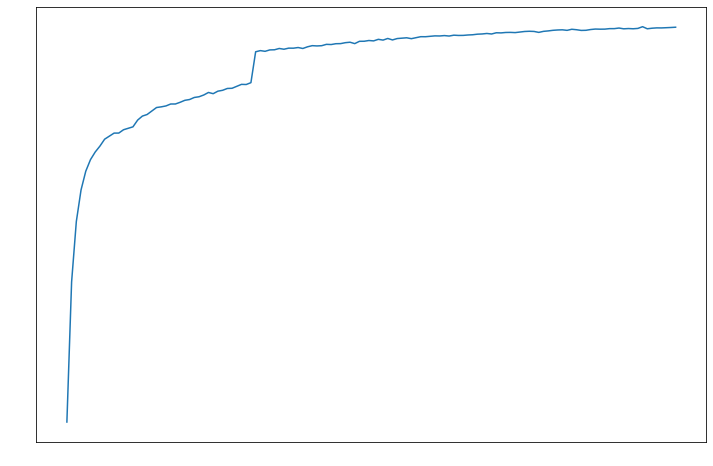

In [160]:
plt.figure(figsize=(12,8))
plt.plot(np.hstack((history.history['accuracy'],history2.history['accuracy'],history3.history['accuracy'],history4.history['accuracy'],history5.history['accuracy'])))
plt.tick_params(axis='both',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

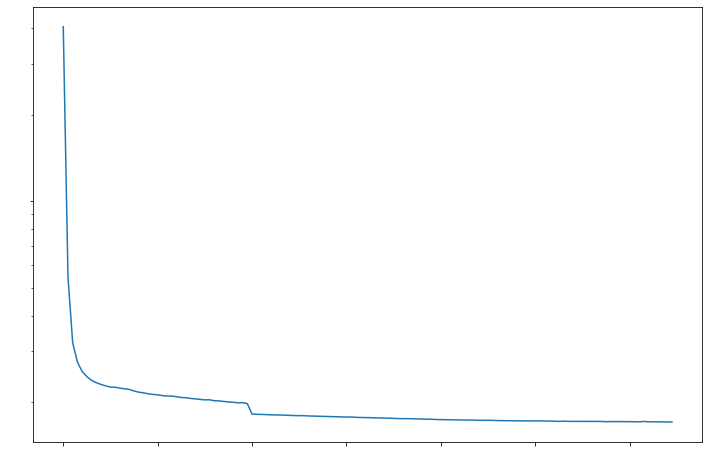

In [159]:
plt.figure(figsize=(12,8))
plt.plot(np.hstack((history.history['loss'],history2.history['loss'],history3.history['loss'],history4.history['loss'],history5.history['loss'])))
plt.xticks(color='white')
plt.yticks(color='white')
plt.yscale('log')

plt.show()

In [161]:
model.save('transfer_learning_model_120_epochs_of_training_batch_500')

INFO:tensorflow:Assets written to: transfer_learning_model_120_epochs_of_training_batch_500\assets


INFO:tensorflow:Assets written to: transfer_learning_model_120_epochs_of_training_batch_500\assets


In [162]:
history5=model.fit(x_train,y_train,batch_size=500,epochs=6 0)

Epoch 1/60
376/376 [==============================] - 27s 73ms/step - loss: 1.7064 - accuracy: 0.5521
Epoch 2/60
376/376 [==============================] - 27s 73ms/step - loss: 1.7045 - accuracy: 0.5524
Epoch 3/60
376/376 [==============================] - 27s 72ms/step - loss: 1.7051 - accuracy: 0.5525
Epoch 4/60
376/376 [==============================] - 28s 73ms/step - loss: 1.7017 - accuracy: 0.5530
Epoch 5/60
376/376 [==============================] - 27s 73ms/step - loss: 1.7035 - accuracy: 0.5529
Epoch 6/60
376/376 [==============================] - 28s 74ms/step - loss: 1.7022 - accuracy: 0.5534
Epoch 7/60
376/376 [==============================] - 29s 76ms/step - loss: 1.7021 - accuracy: 0.5529
Epoch 8/60
376/376 [==============================] - 29s 77ms/step - loss: 1.7019 - accuracy: 0.5531
Epoch 9/60
376/376 [==============================] - 26s 68ms/step - loss: 1.7006 - accuracy: 0.55350s - loss: 1.7005 - accuracy: 
Epoch 10/60
376/376 [==============================]

KeyboardInterrupt: 

### Adding a validation split

In [25]:
history=model.fit(x_train,y_train,batch_size=500,epochs=50,validation_split=0.2)

Epoch 1/50
301/301 [==============================] - 30s 97ms/step - loss: 46.0738 - accuracy: 0.1615 - val_loss: 9.7615 - val_accuracy: 0.2360
Epoch 2/50
301/301 [==============================] - 29s 97ms/step - loss: 5.9630 - accuracy: 0.2863 - val_loss: 3.9811 - val_accuracy: 0.3121
Epoch 3/50
301/301 [==============================] - 32s 106ms/step - loss: 3.2973 - accuracy: 0.3388 - val_loss: 2.9369 - val_accuracy: 0.3654
Epoch 4/50
301/301 [==============================] - 34s 115ms/step - loss: 2.7500 - accuracy: 0.3736 - val_loss: 2.6452 - val_accuracy: 0.3957
Epoch 5/50
301/301 [==============================] - 34s 112ms/step - loss: 2.5328 - accuracy: 0.3981 - val_loss: 2.4916 - val_accuracy: 0.4103
Epoch 6/50
301/301 [==============================] - 34s 112ms/step - loss: 2.4186 - accuracy: 0.4146 - val_loss: 2.3740 - val_accuracy: 0.4258
Epoch 7/50
301/301 [==============================] - 33s 111ms/step - loss: 2.3391 - accuracy: 0.4273 - val_loss: 2.3503 - val_acc

KeyboardInterrupt: 

In [29]:
np.random.seed(123)
history2=model.fit(x_train,y_train,batch_size=500,epochs=29,validation_split=0.2)

Epoch 1/29
301/301 [==============================] - 29s 95ms/step - loss: 2.0112 - accuracy: 0.4892 - val_loss: 2.0336 - val_accuracy: 0.4837
Epoch 2/29
301/301 [==============================] - 28s 94ms/step - loss: 2.0045 - accuracy: 0.4912 - val_loss: 2.0275 - val_accuracy: 0.4873
Epoch 3/29
301/301 [==============================] - 28s 94ms/step - loss: 1.9993 - accuracy: 0.4931 - val_loss: 1.9992 - val_accuracy: 0.4962
Epoch 4/29
301/301 [==============================] - 28s 93ms/step - loss: 1.9976 - accuracy: 0.4920 - val_loss: 2.0137 - val_accuracy: 0.4912
Epoch 5/29
301/301 [==============================] - 32s 107ms/step - loss: 1.9870 - accuracy: 0.4951 - val_loss: 1.9869 - val_accuracy: 0.4965
Epoch 6/29
301/301 [==============================] - ETA: 0s - loss: 1.9822 - accuracy: 0.4961

KeyboardInterrupt: 

In [30]:
np.random.seed(123)
history2=model.fit(x_train,y_train,batch_size=500,epochs=24,validation_split=0.2)

Epoch 1/24
301/301 [==============================] - 27s 89ms/step - loss: 1.9775 - accuracy: 0.4955 - val_loss: 1.9768 - val_accuracy: 0.4991
Epoch 2/24
301/301 [==============================] - 28s 93ms/step - loss: 1.9767 - accuracy: 0.4951 - val_loss: 1.9725 - val_accuracy: 0.5012
Epoch 3/24
301/301 [==============================] - 28s 93ms/step - loss: 1.9658 - accuracy: 0.4974 - val_loss: 1.9882 - val_accuracy: 0.4948
Epoch 4/24
301/301 [==============================] - 29s 95ms/step - loss: 1.9607 - accuracy: 0.4993 - val_loss: 1.9687 - val_accuracy: 0.4941
Epoch 5/24
301/301 [==============================] - 29s 97ms/step - loss: 1.9592 - accuracy: 0.4984 - val_loss: 1.9597 - val_accuracy: 0.5003
Epoch 6/24
301/301 [==============================] - 27s 91ms/step - loss: 1.9560 - accuracy: 0.4997 - val_loss: 1.9525 - val_accuracy: 0.5038
Epoch 7/24
301/301 [==============================] - 28s 92ms/step - loss: 1.9491 - accuracy: 0.5017 - val_loss: 1.9571 - val_accuracy:

In [31]:
history3=model.fit(x_train,y_train,batch_size=500,epochs=10,validation_split=0.2)

Epoch 1/10
301/301 [==============================] - 28s 94ms/step - loss: 1.9002 - accuracy: 0.5115 - val_loss: 1.8869 - val_accuracy: 0.5139
Epoch 2/10
301/301 [==============================] - 27s 89ms/step - loss: 1.8941 - accuracy: 0.5123 - val_loss: 1.8910 - val_accuracy: 0.5136
Epoch 3/10
301/301 [==============================] - 28s 93ms/step - loss: 1.8907 - accuracy: 0.5130 - val_loss: 1.8866 - val_accuracy: 0.5156
Epoch 4/10
301/301 [==============================] - 28s 94ms/step - loss: 1.8867 - accuracy: 0.5136 - val_loss: 1.8844 - val_accuracy: 0.5164
Epoch 5/10
301/301 [==============================] - 31s 103ms/step - loss: 1.8855 - accuracy: 0.5138 - val_loss: 1.8909 - val_accuracy: 0.5132
Epoch 6/10
301/301 [==============================] - 34s 113ms/step - loss: 1.8865 - accuracy: 0.5142 - val_loss: 1.8792 - val_accuracy: 0.5152
Epoch 7/10
301/301 [==============================] - 30s 100ms/step - loss: 1.8807 - accuracy: 0.5160 - val_loss: 1.8802 - val_accura

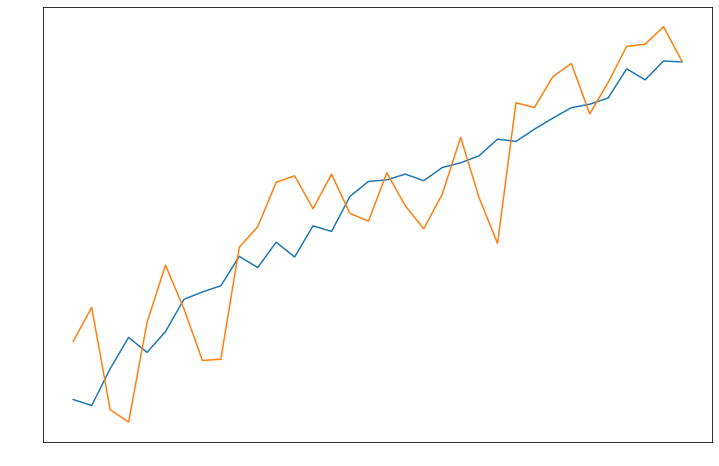

In [39]:
accuracy_array=np.hstack((history2.history['accuracy'],history3.history['accuracy']))
val_accuracy_array=np.hstack((history2.history['val_accuracy'],history3.history['val_accuracy']))

plt.figure(figsize=(12,8))
plt.plot(accuracy_array)
plt.plot(val_accuracy_array)
plt.tick_params(axis='both',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [40]:
test_model=model.evaluate(x_test,y_test)

588/588 [==============================] - 6s 11ms/step - loss: 1.8722 - accuracy: 0.5178


# Taking all data avaible from the small samples

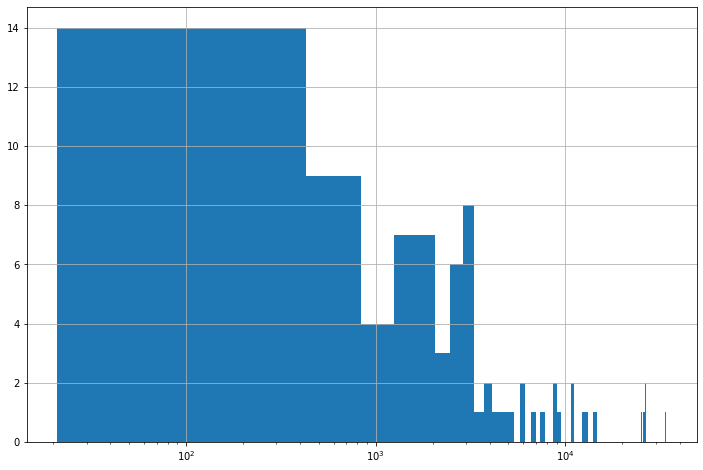

In [32]:
plt.figure(figsize=(12,8))
df.groupby('code_symbol').count()['path'].hist(bins=83)
plt.xscale('log')

In [20]:
df.groupby('code_symbol').count()['path'].sort_values()


code_symbol
38       21
40       45
46       47
52      109
19      137
      ...  
3     25112
8     26141
7     26520
27    26594
5     33997
Name: path, Length: 82, dtype: int64

In [24]:
sample_size=df.groupby('code_symbol').count()['path'].rename('sample_size')


In [25]:
df=df.merge(sample_size,on='code_symbol',how='inner')
df['sample_size_cat']=pd.cut(df['sample_size'],bins=[0,100,1000,1e4,1e10],labels=['extremely small','small','ok','nice'])
df['sample_size_cat']=df.sample_size_cat.cat.codes
df.sample_size_cat.unique()

array([2, 3, 1, 0], dtype=int8)

In [26]:
df.sample(5)

,path,symbol,code_symbol,sample_size_x,sample_size_cat,sample_size_y,sample_size
236684,C:\Users\estevan.amazonas\Desktop\EAAM (1)\pro...,d,35,4852,2,4852,4852
126658,C:\Users\estevan.amazonas\Desktop\EAAM (1)\pro...,2,8,26141,3,26141,26141
104660,C:\Users\estevan.amazonas\Desktop\EAAM (1)\pro...,1,7,26520,3,26520,26520
355580,C:\Users\estevan.amazonas\Desktop\EAAM (1)\pro...,X,27,26594,3,26594,26594
12491,C:\Users\estevan.amazonas\Desktop\EAAM (1)\pro...,(,1,14294,3,14294,14294


In [ ]:
np.random.seed(123)

In [167]:
train_test=[train_test_split(df[df.sample_size_cat==i].index.values,df[df.sample_size_cat==i]['code_symbol'],train_size=j,test_size=k) for i,j,k in zip([0,1,2,3], [0.9,0.9,0.7,0.7],[0.1,0.1,0.3,0.1])]
train_test=np.array(train_test)

In [169]:
x_train_index,x_test_index,y_train,y_test=np.concatenate(train_test[:,0]).ravel(),np.concatenate(train_test[:,1]).ravel(),np.concatenate(train_test[:,2]).ravel(),np.concatenate(train_test[:,3]).ravel()

In [170]:
x_train=preprocessing(x_train_index)
x_test=preprocessing(x_test_index)

In [171]:
hub_url='https://tfhub.dev/tensorflow/tfgan/eval/mnist/logits/1'
model_layers=[hub.KerasLayer( handle=hub_url,input_shape=[28, 28, 1], trainable=False, name='images'), 
layers.Dense(20, activation='relu'),
layers.Dense(82, activation='softmax')]



model=keras.Sequential(model_layers,name='hand_writing')

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())


Model: "hand_writing"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 images (KerasLayer)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 82)                1722      
                                                                 
Total params: 1,942
Trainable params: 1,942
Non-trainable params: 0
_________________________________________________________________
None


In [172]:
x_train[0].shape

(28, 28)

In [173]:
np.random.seed(123)
history=model.fit(x_train,y_train,batch_size=500,epochs=50,validation_split=0.2)

Epoch 1/50
425/425 [==============================] - 41s 95ms/step - loss: 32.5678 - accuracy: 0.1588 - val_loss: 3.5572 - val_accuracy: 0.4500
Epoch 2/50
425/425 [==============================] - 40s 95ms/step - loss: 3.8954 - accuracy: 0.3249 - val_loss: 1.7897 - val_accuracy: 0.5555
Epoch 3/50
425/425 [==============================] - 39s 92ms/step - loss: 2.7681 - accuracy: 0.3713 - val_loss: 1.6462 - val_accuracy: 0.5733
Epoch 4/50
425/425 [==============================] - 40s 95ms/step - loss: 2.5987 - accuracy: 0.3798 - val_loss: 1.6507 - val_accuracy: 0.5537
Epoch 5/50
425/425 [==============================] - 40s 94ms/step - loss: 2.5214 - accuracy: 0.3871 - val_loss: 1.4858 - val_accuracy: 0.6146
Epoch 6/50
425/425 [==============================] - 39s 93ms/step - loss: 2.4916 - accuracy: 0.3902 - val_loss: 1.5410 - val_accuracy: 0.5988
Epoch 7/50
425/425 [==============================] - 39s 91ms/step - loss: 2.4700 - accuracy: 0.3926 - val_loss: 1.6608 - val_accuracy

In [178]:
history.history

{'loss': [32.56782531738281,
  3.8954150676727295,
  2.768068552017212,
  2.598670721054077,
  2.5214130878448486,
  2.491563320159912,
  2.4699578285217285,
  2.4562723636627197,
  2.4479384422302246,
  2.4316906929016113,
  2.417717218399048,
  2.415045738220215,
  2.4054455757141113,
  2.392354965209961,
  2.3839304447174072,
  2.3677709102630615,
  2.361632823944092,
  2.356900215148926,
  2.348527669906616,
  2.3354475498199463,
  2.3309924602508545,
  2.3181159496307373,
  2.3120267391204834,
  2.3051528930664062,
  2.306166887283325,
  2.295942783355713,
  2.294515371322632,
  2.278796434402466,
  2.2797787189483643,
  2.2709598541259766,
  2.266723871231079,
  2.2583813667297363,
  2.251159191131592,
  2.249847650527954,
  2.2414767742156982,
  2.2408030033111572,
  2.230313301086426,
  2.2256019115448,
  2.2241344451904297,
  2.2181248664855957,
  2.209496259689331,
  2.2078850269317627,
  2.1990339756011963,
  2.1959917545318604,
  2.186763048171997,
  2.1813125610351562,
  2

In [179]:
history2=model.fit(x_train,y_train,batch_size=500,epochs=50,validation_split=0.2)

Epoch 1/50
425/425 [==============================] - 40s 93ms/step - loss: 2.1425 - accuracy: 0.4526 - val_loss: 1.3970 - val_accuracy: 0.6446
Epoch 2/50
425/425 [==============================] - 39s 92ms/step - loss: 2.1299 - accuracy: 0.4537 - val_loss: 1.3483 - val_accuracy: 0.6636
Epoch 3/50
425/425 [==============================] - 39s 91ms/step - loss: 2.1192 - accuracy: 0.4558 - val_loss: 1.2984 - val_accuracy: 0.6643
Epoch 4/50
425/425 [==============================] - 39s 91ms/step - loss: 2.1119 - accuracy: 0.4579 - val_loss: 1.2993 - val_accuracy: 0.6725
Epoch 5/50
425/425 [==============================] - 39s 91ms/step - loss: 2.1019 - accuracy: 0.4592 - val_loss: 1.3831 - val_accuracy: 0.6493
Epoch 6/50
425/425 [==============================] - 39s 92ms/step - loss: 2.0936 - accuracy: 0.4614 - val_loss: 1.3195 - val_accuracy: 0.6713
Epoch 7/50
425/425 [==============================] - 202s 476ms/step - loss: 2.0871 - accuracy: 0.4626 - val_loss: 1.3215 - val_accurac

In [180]:
model.evaluate(x_test,y_test,batch_size=500)

136/136 [==============================] - 13s 96ms/step - loss: 2.0725 - accuracy: 0.4516


[2.0725064277648926, 0.451596736907959]

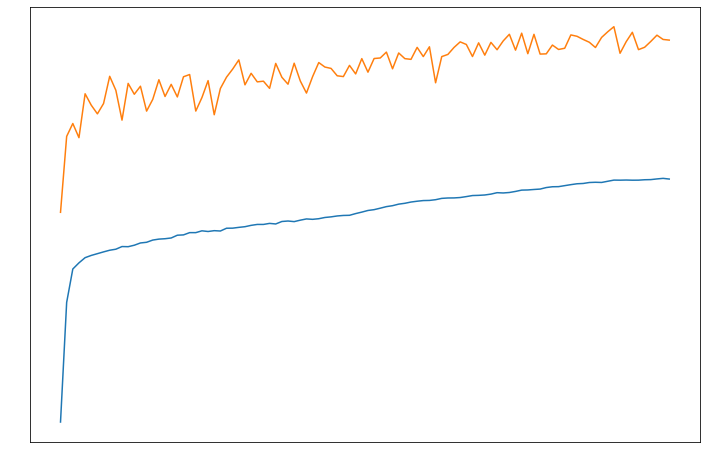

In [181]:
accuracy_array=np.hstack((history.history['accuracy'],history2.history['accuracy']))
val_accuracy_array=np.hstack((history.history['val_accuracy'],history2.history['val_accuracy']))

plt.figure(figsize=(12,8))
plt.plot(accuracy_array)
plt.plot(val_accuracy_array)
plt.tick_params(axis='both',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# trying to Fine tunning the model

In [28]:
train_test=[train_test_split(df[df.sample_size_cat==i].index.values,df[df.sample_size_cat==i]['code_symbol'],train_size=j,test_size=k) for i,j,k in zip([0,1,2,3], [0.9,0.9,0.7,0.7],[0.1,0.1,0.3,0.1])]
train_test=np.array(train_test)
x_train_index,x_test_index,y_train,y_test=np.concatenate(train_test[:,0]).ravel(),np.concatenate(train_test[:,1]).ravel(),np.concatenate(train_test[:,2]).ravel(),np.concatenate(train_test[:,3]).ravel()

C:\Users\estevan.amazonas\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
x_train=preprocessing(x_train_index)
x_test=preprocessing(x_test_index)

In [30]:
hub_url='https://tfhub.dev/tensorflow/tfgan/eval/mnist/logits/1'
model_layers=[hub.KerasLayer( handle=hub_url,input_shape=[28, 28, 1], trainable=True, name='images'), 
layers.Dense(20, activation='relu'),
layers.Dense(82, activation='softmax')]



model=keras.Sequential(model_layers,name='hand_writing')



opt=keras.optimizers.Adam(learning_rate=0.01)


optimizers_set = [
    keras.optimizers.Adam(learning_rate=1e-4),
    keras.optimizers.Adam(learning_rate=1e-2)
]
optimizers_and_layers = [(optimizers_set[0], model.layers[0]), (optimizers_set[1], model.layers[1:])]
opt = optimizers.MultiOptimizer(optimizers_and_layers)

model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
print(model.summary())


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.


Model: "hand_writing"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 images (KerasLayer)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                220       
                                                                 
 dense_3 (Dense)             (None, 82)                1722      
                                                                 
Total params: 1,942
Trainable params: 1,942
Non-trainable params: 0
_________________________________________________________________
None


In [195]:
np.random.seed(123)
history=model.fit(x_train,y_train,batch_size=500,epochs=50,validation_split=0.2)

Epoch 1/50
425/425 [==============================] - 41s 95ms/step - loss: 7.2485 - accuracy: 0.0696 - val_loss: 3.0989 - val_accuracy: 0.1606
Epoch 2/50
425/425 [==============================] - 40s 93ms/step - loss: 3.7684 - accuracy: 0.0972 - val_loss: 2.6908 - val_accuracy: 0.3055
Epoch 3/50
425/425 [==============================] - 41s 96ms/step - loss: 3.2067 - accuracy: 0.2149 - val_loss: 1.9650 - val_accuracy: 0.5003
Epoch 4/50
425/425 [==============================] - 43s 102ms/step - loss: 2.9202 - accuracy: 0.2723 - val_loss: 1.9001 - val_accuracy: 0.5000
Epoch 5/50
425/425 [==============================] - 43s 101ms/step - loss: 2.8782 - accuracy: 0.2794 - val_loss: 1.9059 - val_accuracy: 0.5281
Epoch 6/50
425/425 [==============================] - 40s 94ms/step - loss: 2.8640 - accuracy: 0.2822 - val_loss: 1.8911 - val_accuracy: 0.5138
Epoch 7/50
425/425 [==============================] - 41s 97ms/step - loss: 2.8541 - accuracy: 0.2833 - val_loss: 1.9254 - val_accurac

KeyboardInterrupt: 